# FOI requests data analysis

As of January 29,2022, PST

In this notebook, we merge our scraped information from **foi-ph-scraper** to an existing CSV file of older FOI requests so we can make a viable analysis out of them.

Remember that the **foi-ph-scraper** automatically scrapes new information from the website and updates the CSV it generates so make sure you save an updated first data frame ("df") before you run this.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Back track: Read df1

If you ran my autoscraper in my other repository **(foi-ph-scraper)**, you just need to save the CSV files generated from the scraper of that repository into your computer. 

Remember that the scraper automatically fetches new data and updates the CSV **every Sunday** but creates a new file every time it runs. Hence, get all the related CSVs and then run them in the next cell to combine them into one data frame.

In [23]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df1 = pd.concat(
    map(pd.read_csv, ['foi_2016_Jan20.csv', 'foi20220129-011619.csv']), ignore_index=True)
df1

,agency,date,title,status,purpose,period_covered,link
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN
1,NAP,2016-11-25,"Northrop F-5's, F-8 Vought Crusaders and other...",DENIED,Information and general knowledge,01/01/1964 - 11/25/2016,NaN
2,DICT,2016-11-25,"Request for Architecture of SSS, Pagibig, Phil...",ACCEPTED,To validate if our data is properly secured.,01/01/2016 - 11/25/2016,NaN
3,PCGG,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,DENIED,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN
4,PSA,2016-11-25,"The amount of yellowfin, skipjack, bigeye tuna...",DENIED,Research and Development,01/01/2010 - 12/31/2015,NaN
...,...,...,...,...,...,...,...
87901,ECC,"January 20, 2022",COVID POSITIVE COMPENSATION,SUCCESSFUL,Financial assistance,01/06/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
87902,SSS,"January 20, 2022",FInancial Assistance for COVID 19 Survivor,PENDING,Financial Assistance for COVID 19 Survivor,01/07/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
87903,DOH,"January 20, 2022",COVID 19 Financial Assistance,SUCCESSFUL,Financial Assistance for COVID 19 Survivor,01/07/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
87904,SSS,"January 20, 2022",Financial Assistance re: Covid-19,PENDING,Financial Assistance,01/05/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


Our main problem with **df1** is **incomplete data**. While over 6,000 requests appear a lot, in reality, the data only covers about 45 days of requests out of the **past 6 years** that the FOI website has been up.

This is because the PCOO, as we are told, takes down some old FOI requests from its website, most of the time at the request of the poster.

They do keep **a record** of all requests and they are contained in a separate CSV found below.

## Sidebar: change the 'date' column to date format

We forgot to do this after we scraped and we need to do this here for the merging.

In [24]:
df1.date = pd.to_datetime(df1.date)

## Second (and larger) data frame

We asked the PCOO, which manages the FOI website, for earlier data which are all available through "https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR1rYDiXlMcllT7Ko4bEJUYGTAIWIloljXhk4EmUhJo0ehHksZ3vYIFDkw0#gid=875187444".

It lists down all requests from **September 2016-December 2021.** 

Now, we already actually have this from the one of the files we combined above, but we wanted to get the **REASON FOR DENIAL** column that is only found here, so we would have to undertake another merging. We clean the data first.

In [25]:
df2 = pd.read_csv('eFOI Raw Data Raw Data as of 31 December 2021.csv')
df2

,DATE CREATED,AGENCY,TITLE OF REQUESTED DOCUMENTS,PERIOD/COVERAGE,PURPOSE,STATUS,EXTENDED?,REASON FOR DENIAL
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,NO,—
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,NO,—
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,NO,—
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,YES,—
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,YES,—
...,...,...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL,NO,—
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING,NO,—
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED,NO,—
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL,NO,—


## Cleaning df2

### Rename the columns

Offhand, you will notice already that two columns are unique here vs. the first df: **extended?** and **reason_denial** which explains reasons for denial. 

We decided to just **drop** the two for now here. We may get back to **reason_denial** during our analysis.

Take note that the **first df** likewise have a unique column for **link**. We will keep that just to ensure we can go back to them for analysis later. That means when this both are merged, there will be **NaNs** under **link**.

In [26]:
df2.columns = ['date', 'agency', 'title', 'period_covered', 'purpose', 'status', 'extended', 'reason_denial']
df2 = df2.drop(['extended'], axis= 1)
df2

,date,agency,title,period_covered,purpose,status,reason_denial
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,—
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,—
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,—
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,—
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,—
...,...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL,—
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING,—
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED,—
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL,—


### Convert date to date time

We use regex here.

In [27]:
df2['date'] = df2.date.str.replace("HKT", "")
df2['date'] = df2.date.str.replace(r'[()](\d\d[:]\d\d[:]\d\d[.]\d\d\d)[()]', '', regex=True)
df2.date = pd.to_datetime(df2.date)
df2.head()

,date,agency,title,period_covered,purpose,status,reason_denial
0,2016-11-25,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,—
1,2016-11-25,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,—
2,2016-11-25,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,—
3,2016-11-25,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,—
4,2016-11-25,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,—


## Merging the two dfs

Combine the two dfs into one.

We **remove duplicates** based on two qualifications: date and title of requests. The two need to match in the entries to be dropped. 

In [55]:
df_final = df1.merge(df2, suffixes=('_left')).drop_duplicates(subset=['date', 'title']).reset_index(drop=True)
df_final = df_final.sort_values('date').reset_index(drop=True)
df_final

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
1,DOTr,2016-11-25,LRT and MRT - Passengers Traffic,SUCCESSFUL,Research,01/01/2015 - 11/25/2016,NaN,—
2,DICT,2016-11-25,List of .gov.ph sub-domains,ACCEPTED,Research and development,11/25/2015 - 11/25/2016,NaN,—
3,DOH,2016-11-25,HIV stats in the Philippines,CLOSED,Personal research,11/25/2015 - 11/25/2016,NaN,—
4,DOH,2016-11-25,"Incidence of diarrhea, constipation, and respi...",PARTIALLY SUCCESSFUL,Research,11/25/2010 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...
83254,NTC,2021-12-31,Track my phone,PARTIALLY SUCCESSFUL,to track my phone,12/23/2021 - 12/30/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,—
83255,DSWD,2021-12-31,Request for medical finance assistance,DENIED,Para po sa anak namin na premature na hanggang...,12/17/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,—
83256,BIR,2021-12-31,Copy of Annual Income Tax Return,DENIED,Scholarships,01/31/2021 - 12/12/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,—
83257,DOH,2021-12-31,VaxCert - Covid,SUCCESSFUL,Requirement for Work Abroad,12/31/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,—


## Looking into the NaNs

We already dropped the duplicates, now we look for null values.

In [58]:
df_final.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               1
period_covered        0
link              81482
reason_denial         0
dtype: int64

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [59]:
df_final.status.value_counts(normalize=True) * 100

SUCCESSFUL                43.552048
DENIED                    27.251108
PENDING                    8.927563
PARTIALLY SUCCESSFUL       7.836991
CLOSED                     4.016383
ACCEPTED                   3.985155
AWAITING CLARIFICATION     2.253210
REFERRED                   1.196267
PROCESSING                 0.981275
Name: status, dtype: float64

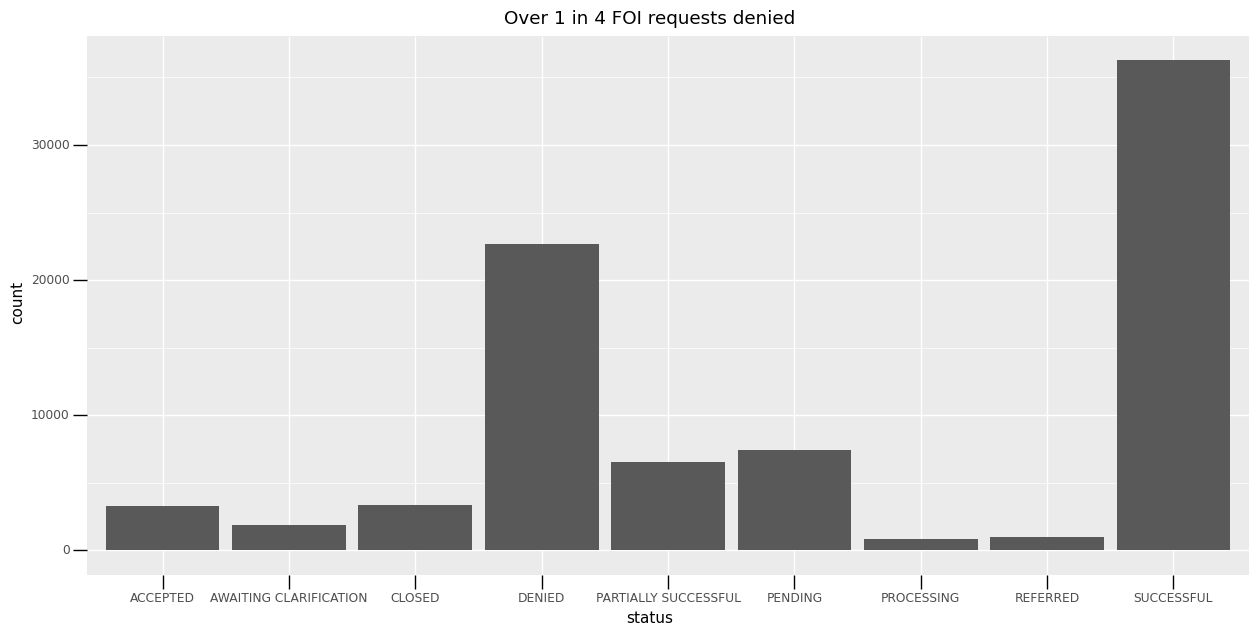

<ggplot: (314886967)>

In [85]:
ggplot(df_final) + geom_bar(aes(x="status")) + theme(figure_size=(15,7), axis_ticks_length=10) + labs(title="Over 1 in 4 FOI requests denied")

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [61]:
df_final.agency.value_counts().head(10)

DOH      5296
PSA      5213
DOLE     4659
SSS      3556
OWWA     3507
DepEd    3477
DSWD     3283
BIR      3173
NTC      2536
DPWH     2268
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [62]:
df_final[df_final.status=="DENIED"].agency.value_counts().head(10)

BIR     2063
DSWD    2023
DENR    1163
DOH      987
DTI      966
DOLE     771
DOTr     717
HDMF     604
DILG     542
PSA      456
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [63]:
df_final[df_final.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate                      30
Vaxcert                                      22
VaxCert                                      20
Vaccination certificate                      19
Swab test result                             19
Annual Hospital Statistical Report           16
Vaccine Certificate                          16
Vax Cert                                     14
Annual Health Facility Statistical Report    14
VAXCERT                                      13
Swab Test Result                             11
Vax Certificate                              10
VaxCertPH                                    10
Vaccine certificate                           9
VACCINATION CERTIFICATE                       8
Mental Health Cases                           8
vaccination certificate                       7
THESIS DATA GATHERING                         7
Vaxcert request                               6
Vax cert                                      6
Name: title, dtype: int64

In [64]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df_final[df_final['title'].isin(vax)]
df_vax

,agency,date,title,status,purpose,period_covered,link,reason_denial
77738,DOH,2021-11-15,Vaccination Certificate,SUCCESSFUL,Travel purpose,11/15/2021 - 11/15/2021,NaN,—
77790,DOH,2021-11-15,Vax Cert,SUCCESSFUL,Travel,11/23/0201 - 11/26/0201,NaN,—
77955,DOH,2021-11-16,VaxCert,SUCCESSFUL,for travel purpose,11/16/2021 - 11/16/2021,NaN,—
78016,DOH,2021-11-16,VaxCertPH,SUCCESSFUL,Follow-Up on VaxCertPH,11/01/2021 - 11/16/2021,NaN,—
78074,DOH,2021-11-16,VAX CERT,SUCCESSFUL,Requirement for work and travel,11/16/2021 - 11/16/2021,NaN,—
78163,DOH,2021-11-17,Vaccination Certificate,SUCCESSFUL,Need of Vax cert for travel,05/31/2021 - 11/17/2021,NaN,—
78222,DOH,2021-11-17,VAXCERT,SUCCESSFUL,FOLLOW UP VAXCERT.,11/01/2021 - 11/17/2021,NaN,—
78392,DOH,2021-11-18,Vaccination Certificate,SUCCESSFUL,Travel Purposes,03/08/2021 - 04/08/2021,NaN,—
78396,DOH,2021-11-18,Vaxcert,SUCCESSFUL,To print my vaxcert for my travel purposes,07/19/2021 - 10/27/2021,NaN,—
78434,DOH,2021-11-18,VaxCert,SUCCESSFUL,Travel,05/29/2021 - 08/13/2021,NaN,—


Interpretation: Nearly 30% of DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [65]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df_final[df_final['title'].isin(sap)]
df_sap[df_sap.status=="DENIED"]

,agency,date,title,status,purpose,period_covered,link,reason_denial
26322,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
26855,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
26864,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
27044,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
27179,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
27235,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
27238,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
27553,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
27557,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
27637,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [66]:
df_final[df_final.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    289
True     191
Name: title, dtype: int64

Interpretation: Nearly three in four OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [67]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df_final[df_final['title'].isin(tax)]
df_tax

,agency,date,title,status,purpose,period_covered,link,reason_denial
10172,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
10343,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
12656,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
16656,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
17657,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
20391,BIR,2019-11-29,BIR 2316,PARTIALLY SUCCESSFUL,BANK LOAN,01/01/2018 - 12/31/2018,NaN,—
21167,BIR,2019-12-26,TIN,DENIED,For verification,07/26/2019 - 12/26/2019,NaN,—
23133,BIR,2020-02-06,BIR 2316,PARTIALLY SUCCESSFUL,For my personal documentation and employment p...,01/01/2019 - 12/31/2019,NaN,—
23432,BIR,2020-02-11,Form 2316,PARTIALLY SUCCESSFUL,US housing loas requirement,01/01/2018 - 10/31/2018,NaN,—
23453,BIR,2020-02-11,BIR 2316,PARTIALLY SUCCESSFUL,For updating my Tax computation.,10/08/2018 - 07/10/2019,NaN,—


In [68]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    54.758190
AWAITING CLARIFICATION    30.421217
SUCCESSFUL                 7.644306
PARTIALLY SUCCESSFUL       2.184087
ACCEPTED                   2.028081
CLOSED                     1.248050
PENDING                    0.780031
PROCESSING                 0.468019
REFERRED                   0.468019
Name: status, dtype: float64

# By topic

## Duterte's drug war

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [71]:
df_final[df_final.agency=="OP"].groupby('status').title.count()
#There were a lot of requests for TIN or tax identification number.

status
PENDING    17
Name: title, dtype: int64

## Top reasons for denial

Applicable only to data as of December 2021.

In [72]:
df_final.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               71143
wrong-agency                     6184
incomplete-request               2549
invalid-request                  1853
information-available-online     1527
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [73]:
df_final.title.str.contains("SALN", regex=False, case=False).value_counts()

False    83071
True       186
Name: title, dtype: int64

Nearly 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [78]:
df_final.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#209 requests mentioning SALN.

0    209
dtype: int64

In [79]:
df_final[df_final.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#35 requests for the SALN of the Vice President.

32

## Track request numbers through time

### By month

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

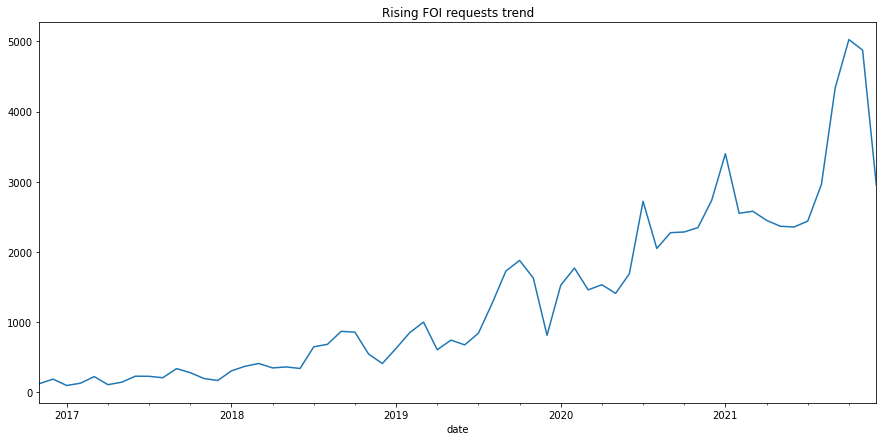

In [80]:
df_final.resample('M', on='date').title.count().plot(title="Rising FOI requests trend", figsize=(15,7))

In [81]:
df_final.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2021-10-31    5027
2021-11-30    4877
2021-09-30    4335
2021-01-31    3398
2021-08-31    2960
2021-12-31    2950
2020-12-31    2732
2020-07-31    2719
2021-03-31    2577
2021-02-28    2548
Name: title, dtype: int64

### By year

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

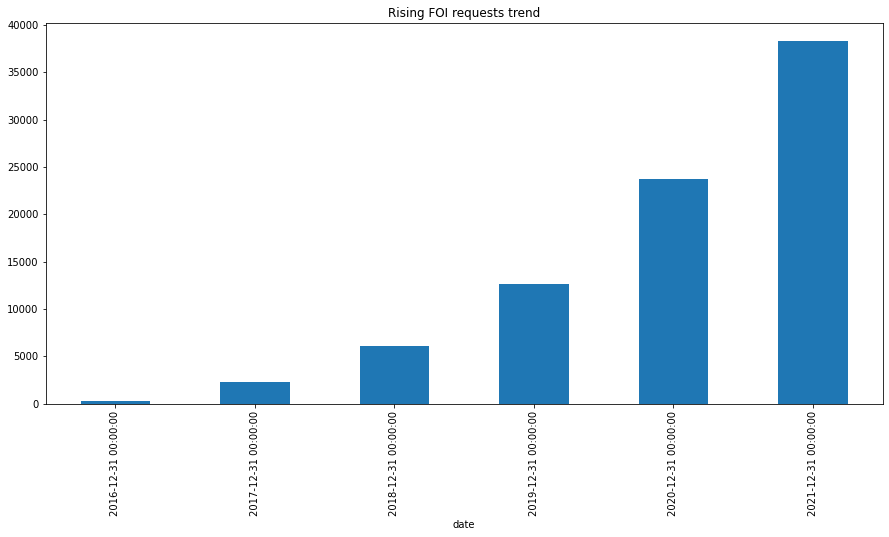

In [82]:
df_final.resample('A', on='date').title.count().plot(kind="bar", title="Rising FOI requests trend", figsize=(15,7))

## Year-on-year change shows slowing down increase in FOI requests

In [83]:
df_final.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    663.973064
2018-12-31    167.650948
2019-12-31    107.409847
2020-12-31     88.567799
2021-12-31     61.123274
Freq: A-DEC, Name: title, dtype: float64

## Save combined df to CSV

In [ ]:
#df_final.to_csv("foi(2016-Dec7).csv", index=False)
#pd.read_csv("foi(2016-Dec7).csv")